# Step 1: Import Necessary Libraries
In this step, we will import all the necessary Python libraries that will be used throughout our data exploration and analysis. This includes libraries for data manipulation, analysis, and visualisation.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Export Process

To prepare our dataset for detailed analysis, we used the `mongoexport` command-line tool provided by MongoDB. This tool facilitates the direct export of data from the MongoDB database into a CSV format, which is particularly suitable for data analysis tasks in Python using libraries such as pandas.

### Command Used for Exporting Data:

The following command was executed to export data from the `FoodFacts` database, specifically from the `products` collection. We targeted a comprehensive set of fields that are crucial for our analysis, ensuring a rich dataset that encompasses various aspects of the food products.


To export data from the MongoDB database `FoodFacts`, we used the following command:

mongoexport --uri="mongodb://localhost:27017/FoodFacts" --collection=products --type=csv --fields= field names --out="/path/to/your/exported_data.csv"



### Columns Included in the Export

The exported data encompasses a comprehensive set of columns that largely align with those found in a corresponding Kaggle dataset.  However, it's important to note that not all columns may exactly match those in the database, and some may carry different tag names or may not be present in the database at all.

### Columns List:

- `code`
- `creator`
- `created_t`
- `last_modified_t`
- `product_name`
- `generic_name`
- `quantity`
- `packaging`
- `brands`
- `categories`
- `compared_to_category`
- `origins`
- `manufacturing_places`
- `labels`
- `emb_codes`
- `purchase_places`
- `stores`
- `countries`
- `ingredients_text`
- `allergens`
- `traces`
- `serving_size`
- `nutriments`
- `additives_n`
- `additives_tags`
- `ingredients_from_palm_oil_n`
- `ingredients_from_palm_oil_tags`
- `ingredients_that_may_be_from_palm_oil_n`
- `ingredients_that_may_be_from_palm_oil_tags`
- `nutrition_grades`
- `pnns_groups_1`
- `pnns_groups_2`
- `states`
- `ecoscore_score`
- `ecoscore_grade`


# Step 2: Load the Dataset into a DataFrame
Here, we'll load our dataset from its source into a pandas DataFrame

In [2]:
df = pd.read_csv('exported_data.csv',encoding='utf-8',low_memory=False)

# Step 3: Preview the Data
After loading the data, we'll preview the first few rows of our dataset using the `head()` function. We'll also use the `describe()` function to get a statistical summary of the numerical columns. This initial peek into the data helps us understand its structure, content, and the types of data we're dealing with.


In [3]:
df.head()

,code,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,brands,categories,...,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grades,pnns_groups_1,pnns_groups_2,states,ecoscore_score,ecoscore_grade
0,0000000000,zoneblockscommunity,1480088467,1696325150,Brandenburger Stachelbeere,NaN,750g,NaN,"Panera Bread, BoFrost, Privat, Coppenrath & Wi...",NaN,...,NaN,[],NaN,[],unknown,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...",NaN,unknown
1,0000000000000,back11basics,1476785159,1644527423,Chocolat au lait,Sugar Free Centerfilled Chewing Gum,30g,"30g bottle, Slim Bottle","San Cassiano,Pronto®","Snacks, Sweet snacks, Confectioneries, Chewing...",...,0.0,[],0.0,[],not-applicable,Sugary snacks,Sweets,"en:to-be-completed, en:nutrition-facts-complet...",NaN,unknown
2,0000000000017,kiliweb,1529059080,1561463718,Vitória crackers,NaN,NaN,NaN,NaN,NaN,...,NaN,[],NaN,[],unknown,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...",NaN,unknown
3,0000000000100,del51,1444572561,1444659212,moutarde au moût de raisin,NaN,100g,NaN,courte paille,"Condiments, Sauces, Moutardes, en:groceries",...,0.0,[],0.0,[],d,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-complet...",54.0,c
4,0000000000123,kiliweb,1535737982,1535737986,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,...,NaN,[],NaN,[],unknown,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...",NaN,unknown


## Statistical Summary of Dataset

The `df.describe()` method offers a comprehensive statistical overview of the numerical columns within our dataset. Here's a breakdown of key insights and implications derived from this summary:

### Overview of Columns

- **Timestamps (`created_t` and `last_modified_t`):** Indicate the creation and last modification times of products, represented as Unix timestamps.

- **Additives (`additives_n`):** Show the count of additives per product, with an average around 2. 

- **Palm Oil Ingredients (`ingredients_from_palm_oil_n` and `ingredients_that_may_be_from_palm_oil_n`):** These columns highlight the presence (or potential presence) of palm oil-derived ingredients in products. The low averages suggest a minimal use of palm oil ingredients, a trend possibly driven by environmental considerations.

- **Ecoscore (`ecoscore_score`):** This environmental impact score averages at approximately 49.49, with scores ranging from -30 to 125. 

### Key Takeaways

- **Data Completeness:** There's noticeable data missing in several columns, notably in `additives_n`, `ingredients_from_palm_oil_n`, `ingredients_that_may_be_from_palm_oil_n`, and `ecoscore_score`, which requires addressing through data cleaning processes.

- **Environmental Insights:** The range of `ecoscore_score`, from negative to highly positive scores, underscores the wide disparities in the environmental impacts of products. This variation opens up opportunities for in-depth exploration of the factors influencing sustainability.




In [4]:
df.describe()

,created_t,last_modified_t,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,ecoscore_score
count,1.277375e+06,1.277375e+06,634658.000000,634658.000000,634658.000000,462715.000000
mean,1.532772e+09,1.625641e+09,2.012849,0.022705,0.073146,49.488573
std,4.463280e+07,5.338893e+07,2.862717,0.150958,0.311746,25.358566
min,1.328021e+09,1.353582e+09,0.000000,0.000000,0.000000,-30.000000
25%,1.495295e+09,1.587576e+09,0.000000,0.000000,0.000000,32.000000
50%,1.539007e+09,1.627200e+09,1.000000,0.000000,0.000000,49.000000
75%,1.570185e+09,1.678274e+09,3.000000,0.000000,0.000000,72.000000
max,1.683912e+09,1.707735e+09,46.000000,3.000000,6.000000,125.000000


# Data Cleaning and Formatting Strategy

Given the extensive dataset from Open Food Facts, our initial assessment has highlighted a need for meticulous data cleaning and formatting to ensure the reliability and accuracy of our analysis.





In [5]:
missing_percentage = df.isnull().mean() * 100

# Sort the percentages in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Print the sorted percentages
print("Columns with the highest percentages of missing values:")
print(missing_percentage_sorted)

Columns with the highest percentages of missing values:
origins                                       93.672571
traces                                        92.533281
emb_codes                                     91.665016
manufacturing_places                          90.752833
generic_name                                  90.697642
purchase_places                               88.490381
allergens                                     84.564674
stores                                        80.545729
packaging                                     79.858303
serving_size                                  68.295998
labels                                        65.365065
ecoscore_score                                63.776103
quantity                                      62.333222
additives_n                                   50.315452
ingredients_that_may_be_from_palm_oil_n       50.315452
ingredients_text                              50.315452
ingredients_from_palm_oil_n                   50

### High Missing Values
- **Columns with >90% Missing Data**: `origins`, `traces`, `emb_codes`, `manufacturing_places`, and `generic_name` exhibit exceedingly high levels of missing data. Given their limited availability and potential minimal impact on our analysis, these columns will be removed.



In [6]:
columns_to_drop = ['origins', 'traces', 'emb_codes', 'manufacturing_places', 'generic_name']
df.drop(columns=columns_to_drop, inplace=True)


### Moderate to High Missing Values
- **Strategic Imputation for Eco-Score Columns**: The `ecoscore_score` and `ecoscore_grade` columns are pivotal for our environmental impact analysis. Missing values in `ecoscore_score` will be imputed with `-1`, indicating an absence of data, while `ecoscore_grade` will be filled with 'Unknown'.

In [7]:
df['ecoscore_score']=df['ecoscore_score'].fillna(-1)
df['ecoscore_grade']=df['ecoscore_grade'].fillna('unknown')


- **Filling Other Key Columns**: For columns like `categories`, `compared_to_category`, `brands`, and `product_name`, which have a considerable impact on our analysis but contain missing values, we'll impute missing data with 'Unknown'.

In [8]:
key_columns = ['categories', 'brands', 'product_name','compared_to_category']
for column in key_columns:
    df[column].fillna('unknown', inplace=True)

## Data Formatting and Normalisation

To ensure consistency and facilitate analysis, several formatting steps will be applied:

### Date Formatting
- **Unix Timestamps to Datetime**: `created_t` and `last_modified_t` will be converted from Unix timestamps to a more interpretable datetime format.

In [9]:
df['created_t'] = pd.to_datetime(df['created_t'], unit='s')
df['last_modified_t'] = pd.to_datetime(df['last_modified_t'], unit='s')

### Text Standardisation
- **Case Normalisation**: All textual data, especially in columns like `product_name`, `brands`, `categories` and  `compared_to_category`, will be converted to lowercase to maintain uniformity.

In [10]:
text_columns = ['product_name', 'brands', 'categories','compared_to_category']
for column in text_columns:
    df[column] = df[column].str.lower()

In [11]:
missing_percentage = df.isnull().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print("Columns with the highest percentages of missing values:")
print(missing_percentage_sorted)

Columns with the highest percentages of missing values:
purchase_places                               88.490381
allergens                                     84.564674
stores                                        80.545729
packaging                                     79.858303
serving_size                                  68.295998
labels                                        65.365065
quantity                                      62.333222
ingredients_text                              50.315452
ingredients_that_may_be_from_palm_oil_n       50.315452
additives_n                                   50.315452
ingredients_from_palm_oil_n                   50.315452
ingredients_that_may_be_from_palm_oil_tags     1.521245
ingredients_from_palm_oil_tags                 1.521245
additives_tags                                 1.521245
countries                                      0.222409
nutrition_grades                               0.131441
creator                                        0

# Refined Data Cleaning Strategy for Remaining Missing Values

As part of our data cleaning process, we address missing values in both textual and numerical columns. Our strategy involves imputing these missing values with placeholders that indicate an absence of data while allowing us to retain these entries for analysis.

## Imputation for Textual Data

For columns containing textual information, we encounter missing values that are crucial for maintaining comprehensive records. To handle these gaps, we impute the missing entries with the placeholder 'Unknown'. 







In [12]:
# Imputation for textual data with 'Unknown'
columns_text_unknown = ['purchase_places', 'allergens', 'stores', 'packaging', 'labels', 'additives_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'ingredients_from_palm_oil_tags', 'countries', 'nutrition_grades', 'creator','ingredients_text','serving_size','pnns_groups_1','pnns_groups_2','quantity']
df[columns_text_unknown]=df[columns_text_unknown].fillna('unknown')



## Imputation for Numerical Columns

For numerical columns that contain missing data, we apply a similar imputation strategy, using a placeholder value that signifies missing information. In this case, we choose to impute with -1, a value that falls outside the typical range of these columns, ensuring clear differentiation between imputed and actual values.

In [13]:
# For numerical columns
columns_num_unknown= ['ingredients_that_may_be_from_palm_oil_n','additives_n','ingredients_from_palm_oil_n']
df[columns_num_unknown]=df[columns_num_unknown].fillna('-1')

In [14]:
# No missing values. Ready to go!
df.isnull().sum()

code                                          0
creator                                       0
created_t                                     0
last_modified_t                               0
product_name                                  0
quantity                                      0
packaging                                     0
brands                                        0
categories                                    0
compared_to_category                          0
labels                                        0
purchase_places                               0
stores                                        0
countries                                     0
ingredients_text                              0
allergens                                     0
serving_size                                  0
nutriments                                    0
additives_n                                   0
additives_tags                                0
ingredients_from_palm_oil_n             

# Analysis of Food Products Dataset

Our analysis begins by examining the overall landscape of the food products dataset, with a specific focus on understanding the scope and scale of the data we're working with. 

## Total Count of Food Products

The first step in our analysis is to determine the total number of food products included in our dataset. 

In [15]:
total_products = df.shape[0]
print(f"Total number of food products in the dataset: {total_products}")

Total number of food products in the dataset: 1277375


The dataset comprises a total of **1,277,375 food products**, indicating a substantial volume of data for analysis. 

Moving forward, our analysis will leverage this extensive dataset to explore specific areas of interest, such as:
- The availability and distribution of eco-scores across various product categories.
- Detailed examination of eco-score parameters, including packaging data
- Comparative analysis of food products with and without eco-scores, aiming to highlight potential areas for improvement in environmental impact assessments.

This initial count sets the stage for a deeper dive into the dataset, enabling targeted investigations that can contribute to more informed consumer choices and encourage sustainable practices within the food industry.


# Eco-Score Availability Analysis

Understanding the distribution of eco-scores within our dataset is essential for assessing the environmental impact of food products. This analysis focuses on quantifying the number of products that have been assigned an eco-score and those that have not.

## Total Number of Products With and Without Eco-Scores

To gain insight into the eco-score coverage, we calculate both the absolute numbers and the percentage of products with an assigned eco-score.

In [16]:
# Calculate the total number of products with an assigned Eco-Score
products_with_eco_score = (df['ecoscore_score'] != -1).sum()

# Calculate the total number of products without an assigned Eco-Score
products_without_eco_score = (df['ecoscore_score'] == -1).sum()

# Calculate the percentage of products with an assigned Eco-Score
total_products = len(df)
eco_score_percentage = (products_with_eco_score / total_products) * 100

# Calculate the percentage of products without  an assigned Eco-Score
no_eco_score_percentage = (products_without_eco_score / total_products) * 100


In [17]:
print(f"Total number of products with an Eco-Score: {products_with_eco_score}")
print(f"Total number of products without an Eco-Score: {products_without_eco_score}")
print(f"Percentage of products with an Eco-Score: {eco_score_percentage:.2f}%")
print(f"Percentage of products without an Eco-Score: {no_eco_score_percentage:.2f}%")

Total number of products with an Eco-Score: 462095
Total number of products without an Eco-Score: 815280
Percentage of products with an Eco-Score: 36.18%
Percentage of products without an Eco-Score: 63.82%


## Total Number of Products With and Without Packaging

In [18]:
# Count products with and without packaging data
with_packaging = df[df['packaging'] != 'unknown'].shape[0]  
without_packaging = df[df['packaging'] == 'unknown'].shape[0]

packaging_percentage= (with_packaging / total_products) * 100

no_packaging_percentage= (without_packaging / total_products) * 100


print(f"Products with packaging data: {with_packaging}")
print(f"Products without packaging data: {without_packaging}")
print(f"Percentage of products with Packaging: {packaging_percentage:.2f}%")
print(f"Percentage of products without Packaging: {no_packaging_percentage:.2f}%")


Products with packaging data: 257285
Products without packaging data: 1020090
Percentage of products with Packaging: 20.14%
Percentage of products without Packaging: 79.86%


## Combining Eco-Score Analysis With Packaging

In [19]:
products_with_ecoscore = df[df['ecoscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])]

# Then count those with and without packaging data
with_packaging_ecoscore = products_with_ecoscore[products_with_ecoscore['packaging'] != 'unknown'].shape[0]
without_packaging_ecoscore = products_with_ecoscore[products_with_ecoscore['packaging'] == 'unknown'].shape[0]

# Percentage of Products with packaging and without
packaging_percentage_eco_score= (with_packaging_ecoscore / total_products) * 100

no_packaging_percentage_eco_score = (without_packaging_ecoscore / total_products) * 100

print(f"Products with an Eco-Score and packaging data: {with_packaging_ecoscore}")
print(f"Products with an Eco-Score and without packaging data: {without_packaging_ecoscore}")
print(f"Percentage of products with an Eco-Score and packaging data: {packaging_percentage_eco_score:.2f}%")
print(f"Percentage of products with an Eco-Score and without packaging data: {no_packaging_percentage_eco_score:.2f}%")




Products with an Eco-Score and packaging data: 167703
Products with an Eco-Score and without packaging data: 295012
Percentage of products with an Eco-Score and packaging data: 13.13%
Percentage of products with an Eco-Score and without packaging data: 23.10%


## Histogram of Eco-Scores

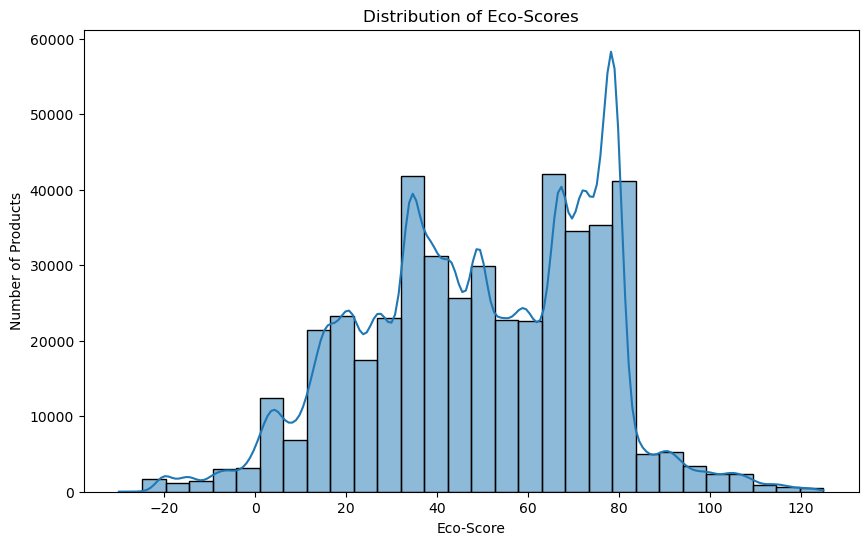

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['ecoscore_score'] != -1], x='ecoscore_score', bins=30, kde = True)
plt.title('Distribution of Eco-Scores')
plt.xlabel('Eco-Score')
plt.ylabel('Number of Products')
plt.show()


The histogram above illustrates the distribution of Eco-Scores across our dataset. Notably, there's a wide spread in scores, with a noticeable concentration of products in the middle range, suggesting a moderate environmental impact. Peaks around scores of 40, 60, and 80 indicate common score values, possibly reflecting standard industry practices. Additionally, the presence of scores below zero may indicate data irregularities or products with significantly adverse environmental impacts, warranting further investigation.

## Distribution of Eco-Scores Grades

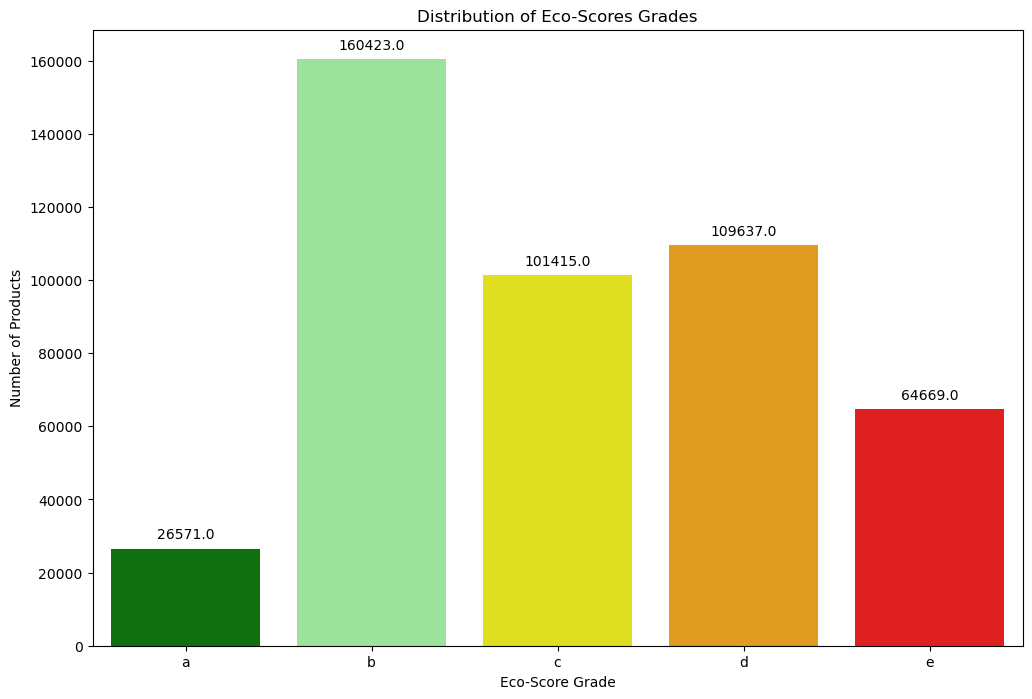

In [21]:
plt.figure(figsize=(12, 8))
eco_score_colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']  # Corresponding to ['a', 'b', 'c', 'd', 'e']
ax = sns.countplot(x='ecoscore_grade', data=df, order=['a', 'b', 'c', 'd', 'e'], palette=eco_score_colors)
plt.title('Distribution of Eco-Scores Grades')
plt.xlabel('Eco-Score Grade')
plt.ylabel('Number of Products')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


The bar chart presents the distribution of Eco-Score grades among our product dataset. The height of each bar signifies the quantity of products assigned to each Eco-Score grade, ranging from 'A' to 'E'. It is evident that grade 'B' represents the majority, indicating a higher prevalence of products with this Eco-Score. Grades 'A' and 'E' have the fewest products, suggesting fewer items with the best and worst environmental impacts, respectively.

##  Eco-Score Distribution across Categories

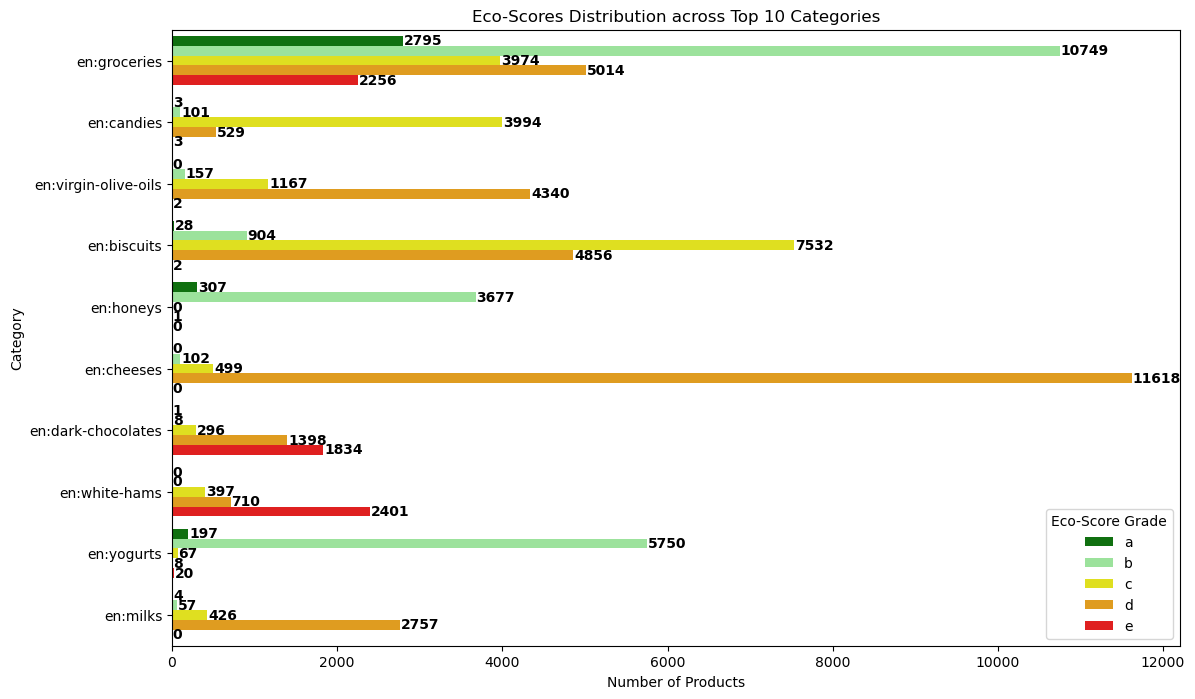

In [39]:
# Eco-Scores Distribution across Top 10 Categories
eco_score_colors = {'a': 'green', 'b': 'lightgreen', 'c': 'yellow', 'd': 'orange', 'e': 'red'}
top_categories = df[df['ecoscore_score'] != -1]['compared_to_category'].value_counts().head(10).index

plt.figure(figsize=(13, 8))
ax = sns.countplot(y='compared_to_category', hue='ecoscore_grade', data=df[(df['ecoscore_score'] != -1) & (df['compared_to_category'].isin(top_categories))],
                   hue_order=['a', 'b', 'c', 'd', 'e'], palette=eco_score_colors)

# Annotate each bar with its count
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x() + width, p.get_y() + height / 2
    ax.annotate(f'{int(width)}', (x + 10, y), ha='left', va='center', color='black', weight='bold', fontsize=10)  # Increased fontsize

plt.title('Eco-Scores Distribution across Top 10 Categories')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.legend(title='Eco-Score Grade')
plt.show()


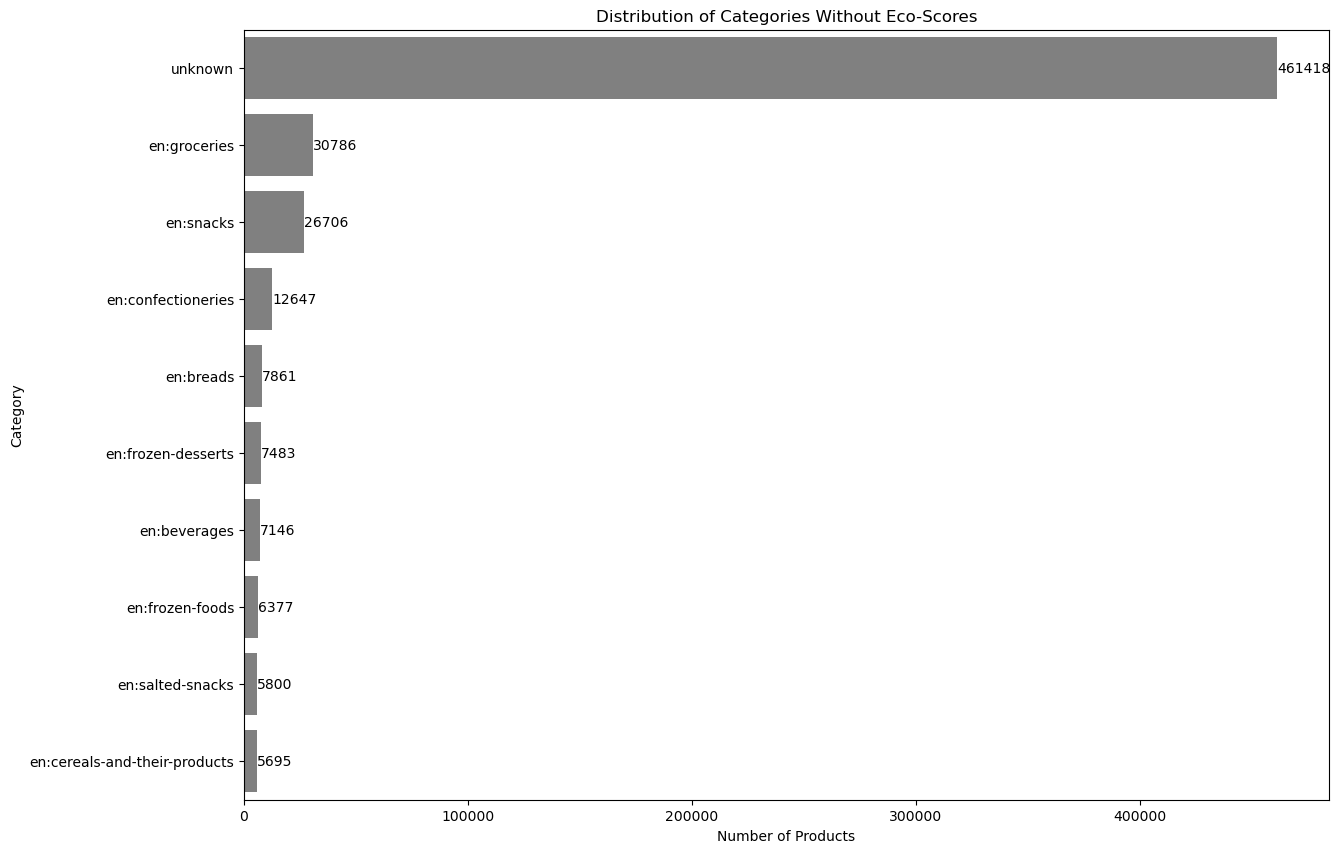

In [24]:
# Find categories without Eco-Scores
categories_without_eco_scores = df[df['ecoscore_score'] == -1]['compared_to_category'].value_counts().head(10)

# Plotting the distribution of categories without Eco-Scores
plt.figure(figsize=(14,10))
ax = sns.barplot(x=categories_without_eco_scores.values, y=categories_without_eco_scores.index, color='gray')
plt.title('Distribution of Categories Without Eco-Scores')
plt.xlabel('Number of Products')
plt.ylabel('Category')

# Add annotations for each bar
for i, v in enumerate(categories_without_eco_scores.values):
    ax.text(v + 3, i, str(v), color='black', va='center')

plt.show()

The bar chart highlights categories with products lacking Eco-Scores, with 'unknown' leading significantly. This indicates a large segment of products where environmental impact has not been assessed, notably in 'groceries' and 'snacks'. Understanding why these categories are underrepresented in Eco-Scores could provide insights into data gaps or product eligibility for environmental scoring.


## Total Number of Products With and Without categories

In [25]:
# Count products with and without categories data
with_categories = df[df['categories'] != 'unknown'].shape[0]  
without_categories = df[df['categories'] == 'unknown'].shape[0]
categories_percentage= (with_categories / total_products) * 100
no_categories_percentage= (without_categories / total_products) * 100


print(f"Products with categories data: {with_categories}")
print(f"Products without categories data: {without_categories}")
print(f"Percentage of products with categories: {categories_percentage:.2f}%")
print(f"Percentage of products without categories: {no_categories_percentage:.2f}%")


Products with categories data: 821201
Products without categories data: 456174
Percentage of products with categories: 64.29%
Percentage of products without categories: 35.71%


## Combining Eco-Score Analysis With categories

In [26]:
products_with_ecoscore = df[df['ecoscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])]
with_categories_ecoscore = products_with_ecoscore[products_with_ecoscore['categories'] != 'unknown'].shape[0]
without_categories_ecoscore = products_with_ecoscore[products_with_ecoscore['categories'] == 'unknown'].shape[0]
categories_percentage_eco_score= (with_categories_ecoscore / total_products) * 100
no_categories_percentage_eco_score = (without_categories_ecoscore / total_products) * 100

print(f"Products with an Eco-Score and categories data: {with_categories_ecoscore}")
print(f"Products with an Eco-Score and without categories data: {without_categories_ecoscore}")
print(f"Percentage of products with an Eco-Score and categories data: {categories_percentage_eco_score:.2f}%")
print(f"Percentage of products with an Eco-Score and without categories data: {no_categories_percentage_eco_score:.2f}%")




Products with an Eco-Score and categories data: 462715
Products with an Eco-Score and without categories data: 0
Percentage of products with an Eco-Score and categories data: 36.22%
Percentage of products with an Eco-Score and without categories data: 0.00%


In [27]:
# Filter for products with unknown categories and retrieve the top 20
unknown_categories = df[(df['ecoscore_score'] == -1) & (df['compared_to_category'] == 'unknown')]
top_10_unknown_categories = unknown_categories['product_name'].head(20)

# Display the top 20 products with unknown categories
print(top_10_unknown_categories)


0      brandenburger stachelbeere
2                vitória crackers
4           sauce sweety chili 0%
5                       mendiants
7     fromage blanc aux myrtilles
8          solène céréales poulet
10     salade de fruits exotiques
11               chouquettes x 30
12            fromage blanc pêche
13         crème dessert chocolat
15               paëlla de poulet
16             salade shaker chef
18              baguette poitevin
19                ciabatta bombay
20                  ciabatta roma
21             farine de blé noir
22        mousse chocolat douceur
23              coca des flandres
24               brochettes dinde
25                 suedois saumon
Name: product_name, dtype: object


## Thoughts on Products with Unknown Categories

1. **Brandenburger Stachelbeere:** Appears to be a specific variety or brand of Stachelbeere (gooseberry) from Brandenburg.

2. **Vitória Crackers:** Crackers brand named Vitória, specific details about the type of crackers are not clear.

3. **Sauce Sweety Chili 0%:** A sauce with a sweet and chili flavor, possibly a low-fat version given the "0%" indication.

4. **Mendiants:** Typically refers to a traditional French confection containing nuts and dried fruits.

5. **Fromage Blanc aux Myrtilles:** Fromage blanc (white cheese) with blueberries.

6. **Solène Céréales Poulet:** Solène brand cereal with chicken.

7. **Salade de Fruits Exotiques:** Exotic fruit salad.

8. **Chouquettes x 30:** Chouquettes, a type of French pastry, possibly a pack of 30 pieces.

9. **Fromage Blanc Pêche:** Fromage blanc with peach flavor.

10. **Crème Dessert Chocolat:** Chocolate-flavored dessert cream.

11. **Paëlla de Poulet:** Chicken paella, a Spanish rice dish.

12. **Salade Shaker Chef:** Chef's salad shaker, likely a convenient packaged salad.

13. **Baguette Poitevin:** A type of baguette, possibly from the Poitou region in France.

14. **Ciabatta Bombay:** Ciabatta bread with a Bombay twist, indicating a unique flavor or ingredient.

15. **Ciabatta Roma:** Ciabatta bread with a Roma (Italian) influence.

16. **Farine de Blé Noir:** Buckwheat flour, often used in traditional Breton cuisine.

17. **Mousse Chocolat Douceur:** Chocolate mousse, suggesting a smooth and indulgent treat.

18. **Coca des Flandres:** A product related to Flanders, possibly a regional specialty.

19. **Brochettes Dinde:** Turkey skewers, a ready-to-cook product.

20. **Suedois Saumon:** Swedish salmon, indicating a salmon dish with a Swedish touch.

These products represent a diverse range of food items, and the challenge lies in categorising them accurately due to the lack of specific category information.


## Eco-Score Distribution across Brands

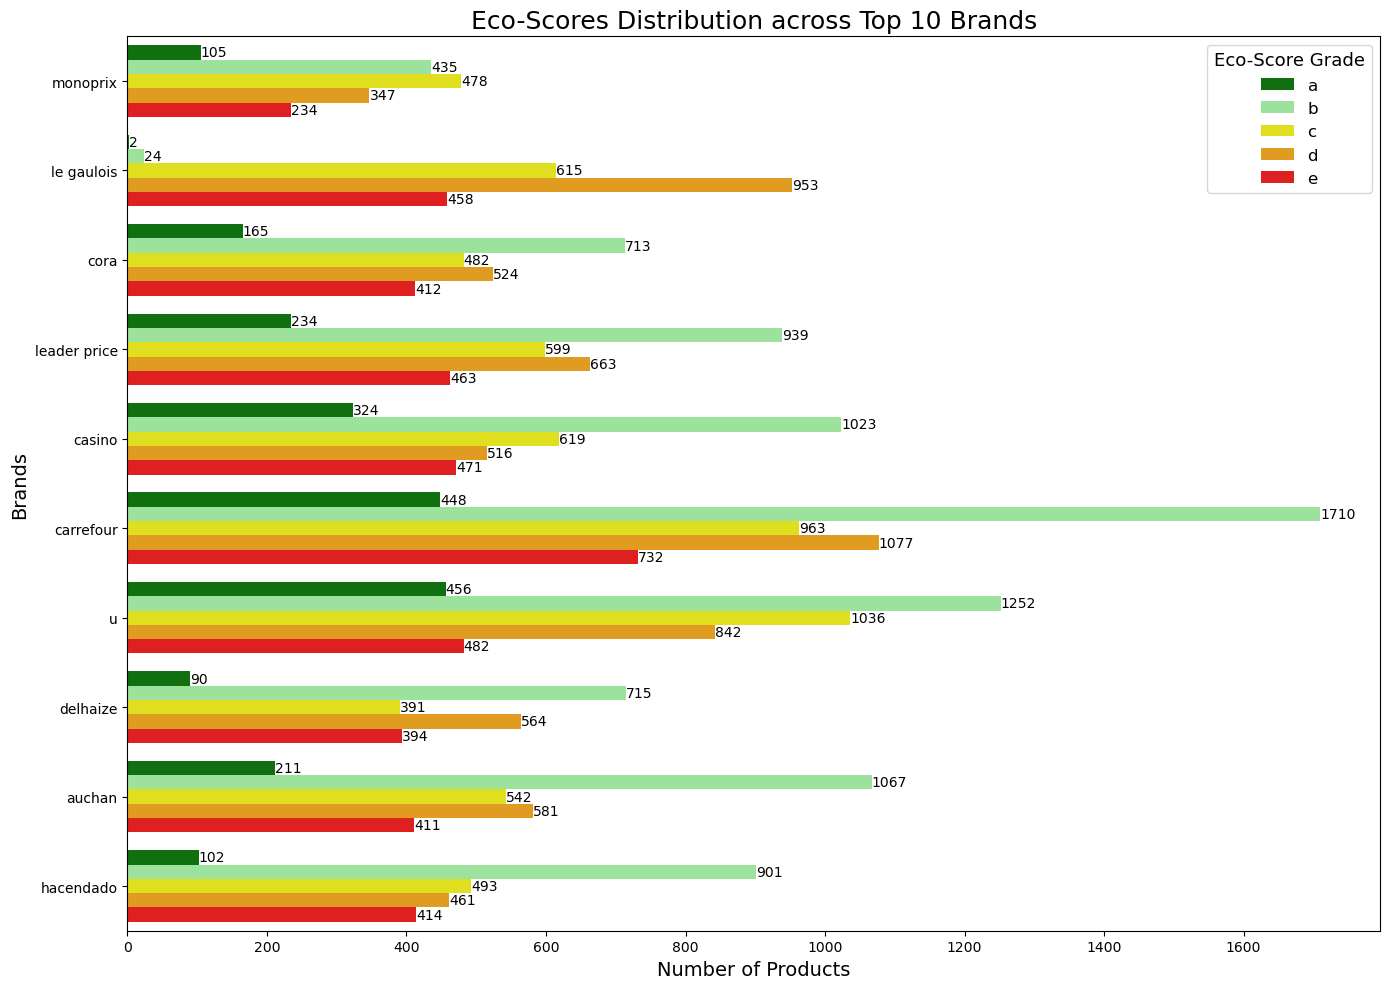

In [28]:
# Filter out products with unknown brands and unknown Eco-Scores
filtered_df = df[(df['ecoscore_score'] != -1) & ~(df['brands'].isin(['Unknown', 'unknown']))]

# Get the top 10 most common brands for products with known Eco-Scores
top_brands = filtered_df['brands'].value_counts().head(10).index
eco_score_colors = {'a': 'green', 'b': 'lightgreen', 'c': 'yellow', 'd': 'orange', 'e': 'red'}
plt.figure(figsize=(14, 10))  
ax = sns.countplot(y='brands', hue='ecoscore_grade', data=filtered_df[filtered_df['brands'].isin(top_brands)],
              hue_order=['a', 'b', 'c', 'd', 'e'], palette=eco_score_colors)

plt.title('Eco-Scores Distribution across Top 10 Brands', fontsize=18)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Brands', fontsize=14)
plt.legend(title='Eco-Score Grade', fontsize=12, title_fontsize='13')

# Add annotations for each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

The bar chart provides a comparison of Eco-Score grades among the top 10 brands. Notably, there's a varied distribution of scores from 'A' to 'E' for each brand, with some showing a higher frequency of environmentally favorable scores ('A' and 'B'). 

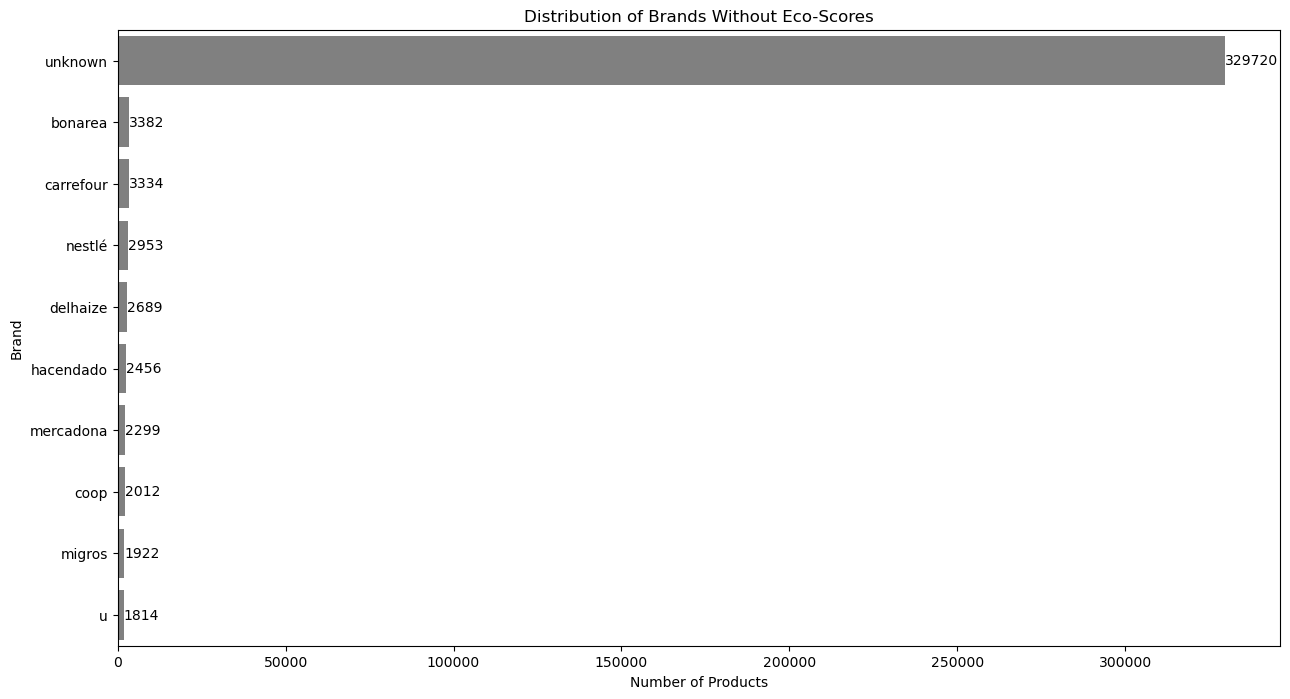

In [30]:
# Find categories without Eco-Scores
categories_without_eco_scores = df[df['ecoscore_score'] == -1]['brands'].value_counts().head(10)

# Plotting the distribution of brands without Eco-Scores
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=categories_without_eco_scores.values, y=categories_without_eco_scores.index, color='gray')
plt.title('Distribution of Brands Without Eco-Scores')
plt.xlabel('Number of Products')
plt.ylabel('Brand')

# Add annotations for each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center')

plt.show()


The bar chart illustrates the number of products by brand that are missing Eco-Scores. A significant portion labeled 'unknown' indicates products that have not been associated with a known brand or lack branding information. Among identified brands, 'bonarea', 'carrefour', 'nestlé' and others, lead with the highest number of products without Eco-Scores.

## Total Number of Products With and Without brands

In [31]:
# Count products with and without brands data
with_brands = df[df['brands'] != 'unknown'].shape[0]  
without_brands = df[df['brands'] == 'unknown'].shape[0]
brands_percentage= (with_brands / total_products) * 100
no_brands_percentage= (without_brands / total_products) * 100


print(f"Products with brands data: {with_brands}")
print(f"Products without brands data: {without_brands}")
print(f"Percentage of products with brands: {brands_percentage:.2f}%")
print(f"Percentage of products without brands: {no_brands_percentage:.2f}%")


Products with brands data: 858491
Products without brands data: 418884
Percentage of products with brands: 67.21%
Percentage of products without brands: 32.79%


## Combining Eco-Score Analysis With brands

In [32]:
products_with_ecoscore = df[df['ecoscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])]
with_brands_ecoscore = products_with_ecoscore[products_with_ecoscore['brands'] != 'unknown'].shape[0]
without_brands_ecoscore = products_with_ecoscore[products_with_ecoscore['brands'] == 'unknown'].shape[0]
brands_percentage_eco_score= (with_brands_ecoscore / total_products) * 100
no_brands_percentage_eco_score = (without_brands_ecoscore / total_products) * 100

print(f"Products with an Eco-Score and brands data: {with_brands_ecoscore}")
print(f"Products with an Eco-Score and without brands data: {without_brands_ecoscore}")
print(f"Percentage of products with an Eco-Score and brands data: {brands_percentage_eco_score:.2f}%")
print(f"Percentage of products with an Eco-Score and without brands data: {no_brands_percentage_eco_score:.2f}%")




Products with an Eco-Score and brands data: 373410
Products with an Eco-Score and without brands data: 89305
Percentage of products with an Eco-Score and brands data: 29.23%
Percentage of products with an Eco-Score and without brands data: 6.99%


## Analysis Results

After performing the calculations, we have discovered the following distribution of Eco-Scores:

- **Total number of products with an Eco-Score**: 462,095
- **Total number of products without an Eco-Score**: 815,280
- **Percentage of products with an Eco-Score**: 36.18%
- **Percentage of products without an Eco-Score**: 63.82%

The presence of Eco-Scores in over 36% of products suggests a notable awareness and integration of environmental considerations within the food industry. This can be seen as a positive step towards sustainability and provides a rich dataset for analysing the environmental practices of food producers and the ecological preferences of consumers.

However, the fact that 63.82% of products do not have an Eco-Score raises important considerations:
- **Data Collection and Reporting**: There's a clear opportunity to improve the collection and dissemination of environmental impact data.
- **Sustainability Efforts**: When many food products don't have Eco-Scores, it means there's a big chance for companies to do better in showing how they care for the environment and share their efforts to be more sustainable.
- **Market Trends**: If lots of products don't have Eco-Scores, it might mean that not all customers are asking for eco-friendly products yet. But this could change, and more companies might start making and advertising greener products in the future.


# Exploring 'Not-Applicable' Eco-Score Grades

In [33]:
df['ecoscore_grade'].values

array(['unknown', 'unknown', 'unknown', ..., 'unknown', 'not-applicable',
       'unknown'], dtype=object)

In our examination of the dataset, a distinct category within the `ecoscore_grade` column has caught our attention: the 'not-applicable' entries. These entries represent products for which an Eco-Score has been considered not applicable.
### Objectives
The focus on 'not-applicable' Eco-Scores aims to:
1. **Quantify the Impact**: Determine how many products are classified as 'not-applicable' and their proportion within our dataset.
2. **Characterise Products**: Identify common characteristics or categories of products that frequently receive a 'not-applicable' rating, seeking patterns or trends.
3. **Understand the Rationale**: Look into why some products might be considered not suitable for Eco-Score assessment, helping us better understand the rules for scoring



In [34]:
# Calculate the total number of products
total_products = len(df)

# Count the number of 'not-applicable' entries
not_applicable_count = (df['ecoscore_grade'] == 'not-applicable').sum()

# Calculate the proportion of 'not-applicable' entries
not_applicable_proportion = (not_applicable_count / total_products) * 100

# Display the results
print(f"Total number of products: {total_products}")
print(f"Number of 'not-applicable' products: {not_applicable_count}")
print(f"Proportion of 'not-applicable' products: {not_applicable_proportion:.2f}%")


Total number of products: 1277375
Number of 'not-applicable' products: 22013
Proportion of 'not-applicable' products: 1.72%


In [35]:
# Filter the DataFrame to include only products with 'not-applicable' Eco-Scores
not_applicable_products = df[df['ecoscore_grade'] == 'not-applicable']

# Group by product categories and count the occurrences
not_applicable_by_category = not_applicable_products['categories'].value_counts()

# Display the top 10 categories with the most 'not-applicable' products
print(not_applicable_by_category.head(10))


beverages, carbonated drinks, sodas                                                                                         4069
beverages, waters                                                                                                           2856
boissons, eaux, eaux de sources, eaux minérales, eaux minérales naturelles                                                   313
bebidas, aguas, aguas de manantial, aguas minerales, aguas minerales naturales                                               264
boissons, eaux, eaux de sources, eaux minérales                                                                              257
boissons, boissons gazeuses, sodas, sodas au cola, boissons avec sucre ajouté                                                243
boissons, boissons énergisantes                                                                                              230
boissons, eaux, eaux de sources                                                                  

In [36]:
# Filtered DataFrame for products with "not-applicable" Eco-Scores
df_not_applicable = df[df['ecoscore_grade'] == 'not-applicable'] 
# Group by brands
brands_not_applicable = df_not_applicable['brands'].value_counts()
print(brands_not_applicable.head(10))  

unknown                   4528
coca-cola                  537
schweppes                  241
pepsi                      214
carrefour                  173
fanta                      169
u                          139
coca cola                  125
red bull                   125
san pellegrino, nestlé     120
Name: brands, dtype: int64


## Insights into 'Not-Applicable' Eco-Score Grades

Our analysis of products with 'not-applicable' Eco-Scores has revealed interesting patterns, particularly within certain product categories and brands. Here's what we've discovered:

### Product Categories
The most frequent categories associated with 'not-applicable' Eco-Scores are predominantly related to beverages:
- Carbonated drinks and sodas lead with a significant count, followed by various types of waters (mineral, spring, etc.).
- Energy drinks and sweetened beverages also appear prominently.

These findings suggest that the Eco-Score assessment criteria might be less applicable or challenging to apply for beverage products, possibly due to the nature of their production, packaging, or environmental impact.

### Brands
The brand analysis further supports the category findings, with major beverage brands like Coca-Cola, Schweppes, Pepsi, Fanta, and Red Bull featuring prominently among products with 'not-applicable' Eco-Scores. Additionally, the presence of 'unknown' indicates a substantial number of products where brand information is either missing or not identified, which could affect the assessment of their environmental impact.


### Implications for Scoring Rules:
This pattern underscores the importance of understanding the Eco-Score system's rules and criteria. For stakeholders and consumers alike, clarifying why beverages frequently receive 'not-applicable' ratings is crucial for transparency and could inform efforts to improve environmental impact assessments in this category.

### Next Steps:
- **Engage with Eco-Score Providers**: Engage with organisations responsible for Eco-Score assessments could yield insights into the specific exclusions or limitations affecting beverage products.
- **Consider Broader Environmental Factors**: Further research into the environmental footprint of beverage production and packaging could illuminate areas for data improvement and more inclusive assessment practices.
